# Setup
## Downloading dependencies
###### *Cell 1*

In [19]:
from IPython.display import clear_output
# If it ain't here, you pip it. https://www.w3schools.com/python/python_ref_modules.asp
!pip install --upgrade kaggle
%pip install --upgrade pandas
%pip install --upgrade scikit-learn
%pip install --upgrade seaborn
clear_output()

## Importing dependencies
###### *Cell 2*

In [162]:
import os
import tkinter as tk
from tkinter import filedialog
import json
from pathlib import Path
import numpy as np
import pandas as pd
import re
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from scipy.stats import skew, kurtosis
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

## Initialising the Kaggle CLI
### Option #1: New token
If you don't already have a token or have lost the file to your current token, in the settings of your Kaggle account, click on the button 'Generate New Token'. Follow the instructions and copy the alphanumeric string at the top when such a floating dialogue appears. Then, run cell 3 and paste the key when prompted.
###### *Cell 3*

In [21]:
def kaggle_key() :
    key = input('Paste your token here, or leave empty if your token comes in the form of a JSON file: ')
    clear_output()
    if len(key) > 3 :
        # Create api.txt in working directory, where `KAGGLE_API_TOKEN {key}`.
        api_file = Path("api.txt")
        with api_file.open("w", encoding="utf-8") as f:
            f.write('KAGGLE_API_TOKEN ' + key)
        os.environ['KAGGLE_API_TOKEN'] = key
        os.environ.pop('KAGGLE_USERNAME', None)
        os.environ.pop('KAGGLE_KEY', None)
        print('The last four characters of your API key are: ' + key[-4:] + '. If you suspect that you have entered something wrong, run cell 4 again. Otherwise, you may move to the next section.')
        return True
    else :
        return False
    
def legacy_kaggle_key() :
    '''
    Opens a file dialog, validates the selection, and returns the path 
    if a valid JSON file is selected. Handles all edge cases.
    '''
    root = tk.Tk()
    root.withdraw()
    root.call('wm', 'attributes', '.', '-topmost', True)
    
    file_path = tk.filedialog.askopenfilename(
        title='Find the file with your Kaggle API key...',
        filetypes=(('JSON files', '*.json'), ('All files', '*.*'))
    )
    
    root.destroy()

    if not file_path :
        # Case: User closes the dialog without selecting anything
        print('No file selected. Run cell 5 again if you like.')
        return
    
    # Now try to open and validate the *contents* of the JSON file
    try :
        with open(file_path, 'r') as f :
            data = json.load(f)
        
        # Case: User selects the correct JSON file that contains their API key
        if 'key' in data and isinstance(data['username'], str) and isinstance(data['key'], str) :
            # Create api.txt in working directory, where `KAGGLE_USERNAME {data['username']}` and `KAGGLE_KEY {data['key']}`.
            api_file = Path("api.txt")
            with api_file.open("w", encoding="utf-8") as f:
                f.write('KAGGLE_USERNAME ' + data['username'] + '\nKAGGLE_KEY ' + data['key'])
            os.environ['KAGGLE_USERNAME'] = data['username']
            os.environ['KAGGLE_KEY'] = data['key']
            os.environ.pop('KAGGLE_API_TOKEN', None)
            print('The last four characters of your API key are: ' + data['key'][-4:] + '. If you suspect that this is not an alphanumeric string, find another file by running cell 5 again. Otherwise, you may move to the next section.')
            
        else :
            # Case: User selects a JSON file, but it's not one that contains their API key
            print('The \'key\' field is missing or invalid. To find another file, run this cell again.')
            
    except Exception :
        print('This file may not contain valid JSON. To find another file, run this cell again.')
        return

# If api.txt is in the working directory, separate by newline, then separate by spaces. Each line has the form '{key} {value}`, where the environment variable `key` should be created with value `value`.
# Otherwise, run `kaggle_key()`. If that returns `False`, then run `legacy_kaggle_key()`.

api_file = Path('api.txt')

if api_file.exists() :
    try :
        with api_file.open('r', encoding='utf-8') as f :
            for line in f :
                line = line.strip()
                if not line or line.startswith('#') :
                    continue

                parts = line.split(None, 1)  # split on first whitespace
                if len(parts) != 2 :
                    continue

                env_key, env_value = parts
                os.environ[env_key] = env_value

    except OSError as e :
        print('Found api.txt but could not read it:\n' + e)
else :
    print('api.txt was not found.')

preview = os.environ.get('KAGGLE_API_TOKEN') or os.environ.get('KAGGLE_KEY')
if preview:
    print('Loaded existing credentials from api.txt. The last four characters of your API key are: ' + preview[-4:] + '. If that looks wrong, run cell 4 or 5.')
else:
    # No api.txt present; go through interactive flow
    if not kaggle_key():
        legacy_kaggle_key()

Loaded existing credentials from api.txt. The last four characters of your API key are: 6d4f. If that looks wrong, run cell 4 or 5.


###### *Cell 4*

In [ ]:
if not kaggle_key() :
    print('You probably didn\'t enter a valid key. Run this cell again if you like.')

###### *Cell 5*

In [ ]:
legacy_kaggle_key()

###### *Cell 6*

In [30]:
!pip show kagglesdk

Name: kagglesdk
Version: 0.1.14
Summary: Bindings to access kaggle's external-facing APIs
Home-page: https://github.com/Kaggle/kagglesdk
Author: 
Author-email: Kaggle <support@kaggle.com>
License: Apache License
                           Version 2.0, January 2004
                        http://www.apache.org/licenses/

   TERMS AND CONDITIONS FOR USE, REPRODUCTION, AND DISTRIBUTION

   1. Definitions.

      "License" shall mean the terms and conditions for use, reproduction,
      and distribution as defined by Sections 1 through 9 of this document.

      "Licensor" shall mean the copyright owner or entity authorized by
      the copyright owner that is granting the License.

      "Legal Entity" shall mean the union of the acting entity and all
      other entities that control, are controlled by, or are under common
      control with that entity. For the purposes of this definition,
      "control" means (i) the power, direct or indirect, to cause the
      direction or managemen

In [26]:
kaggle_module_description = !pip show kaggle
os.environ['PATH'] = os.environ['PATH'] + kaggle_module_description[-3][10:-13] + 'Scripts;'
!kaggle datasets download flkuhm/art-price-dataset -p dataset -f artDataset.csv

Traceback (most recent call last):
  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "C:\Users\Homeworkace\AppData\Local\Programs\Python\Python312\Scripts\kaggle.exe\__main__.py", line 4, in <module>
  File "C:\Users\Homeworkace\AppData\Local\Programs\Python\Python312\Lib\site-packages\kaggle\__init__.py", line 4, in <module>
    from kaggle.api.kaggle_api_extended import KaggleApi
  File "C:\Users\Homeworkace\AppData\Local\Programs\Python\Python312\Lib\site-packages\kaggle\api\kaggle_api_extended.py", line 55, in <module>
    from kagglesdk import get_access_token_from_env, KaggleClient, KaggleCredentials, KaggleEnv, KaggleOAuth  # type: ignore[attr-defined]
    ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
ModuleNotFoundError: No module named 'kagglesdk'


I assume:
- Your kernel is running on Python 3.13, and Windows 11.
- You have 'tcl/tk and IDLE' checked this Python environment was installed. In other words, if you were to create and run a cell anywhere in this notebook with the following line `!pip freeze`, you are able to find `tkinter` in the output.
- You are not running the kernel with any virtual environment.
# Preparing the dataset
If you're unable to load the dataset below, then go back up to cell 4.
###### *Cell 7*

In [107]:
raw_dataset = dataset = pd.read_csv('dataset/artDataset.csv')
raw_dataset

,Unnamed: 0,price,artist,title,yearCreation,signed,condition,period,movement
0,0,28.500 USD,Tommaso Ottieri,Bayreuth Opera,2021,Signed on verso,This work is in excellent condition.,Contemporary,Baroque
1,1,3.000 USD,Pavel Tchelitchew,Drawings of the Opera,First Half 20th Century,Signed and titled,Not examined out of frame.No obvious signs of ...,Post-War,Surrealism
2,2,5.000 USD,Leo Gabin,Two on Sidewalk,2016,"Signed, titled and dated on verso",This work is in excellent condition.,Contemporary,Abstract
3,3,5.000 USD,Matthias Dornfeld,Blumenszene,2010,"Signed, titled and dated on the reverse with t...",This work is in excellent condition.There is m...,Contemporary,Abstract
4,4,2.500 USD,Alexis Marguerite Teplin,Feverish Embarkation,2001,Signed on verso,This work is in excellent condition.,Contemporary,Abstract
...,...,...,...,...,...,...,...,...,...
749,749,680 USD,Jane Kent,Miracle Grow #17,2012,Signed and dated on lower right.,Not examined out of frame.No obvious signs of ...,Contemporary,Abstract
750,750,1.275 USD,Gary Bower,Rolph Series,1970,[nan],Not examined out of frame.Significant undulati...,Contemporary,Geometric Abstraction
751,751,680 USD,Jane Kent,Untitled,2012,[nan],Not examined out of frame.No apparent imperfec...,Contemporary,Geometric Abstraction
752,752,1.275 USD,T. L. Solien,Juniper,1986,[nan],Not examined outside of frame.Pinholes at edge...,Contemporary,Abstract


The current columns are:
- `Unnamed: 0`: why even lol
- `price`: Numerical
- `artist`: Categorical
- `title`: Not needed?
- `yearCreation`: Numerical, but can be split into a categorical component
- `signed`: Word frequency
- `condition`: Word frequency
- `period`: Categorical, but might line up with `yearCreation`.
- `movement`: Categorical or word frequency

## `Unnamed: 0`
At first glance, the values in this column line up with the values as prescribed by the leftmost index column. There are a variety of parameters when using `pandas.DataFrame.to_csv()` to save a pandas DataFrame to `.csv`. If there is at least one column filled entirely with unique, non-empty values, `index_label` can be used to designate one of them as the index column. Otherwise, `index` can be used to influence whether a new column of indices is created. If an index-like column already exists in the DataFrame, but isn't designated as such, pandas will treat it like any other column, as it could contain real information. As the `Unnamed: 0` column seems to be a common enough phenomenon within datasets uploaded to Kaggle (https://www.kaggle.com/discussions/general/354943), I believe this is what happened in the creation of this dataset.

To find out if `Unnamed: 0` is effectively an index column, I created a filter to find any rows whose `Unnamed: 0` value is different from the index column's.
###### *Cell 8*

In [108]:
dataset[dataset['Unnamed: 0'] != dataset.index]

,Unnamed: 0,price,artist,title,yearCreation,signed,condition,period,movement


There were none. Therefore, all rows had values which corresponded with their indices. Since `Unnamed: 0` is an index column and does not contain any other unique information, I chose to remove it.
###### *Cell 9*

In [109]:
dataset = dataset.drop(columns = ['Unnamed: 0'])

## `price`
The prices in each row seem to follow a pattern. The United States dollar (USD) is specified as a currency, and the thousands are separated by periods (`.`). This is reminiscent of a convention of writing large numbers that is popular in continental Europe. In contrast to the Anglophone convention, which uses commas (`,`) to separate thousands, and a single period to mark the beginning of the decimal part, the continental convention swaps them around. Nevertheless, characters like these, including the `USD` suffix, cause the prices to be represented as strings. I will need to convert them into numerical representations so that I can carry out sorting and linear regression.

I sought to verify these assumptions:
1. That all prices are denominated in USD.
2. That the period is used as a thousands separator at all times.

First, I searched for any rows whose price was not annnotated with `' USD'`.
###### *Cell 10*

In [110]:
dataset[~dataset['price'].str.endswith(' USD')]

,price,artist,title,yearCreation,signed,condition,period,movement


There were none, meaning that all prices were annotated in `' USD'`. There could be additional clerical errors, like `'USD'` appearing more than once. To test that, I provisionally removed the `' USD'` suffix in a copy of the column, then tested for the presence of additional letters by combining all the strings into one and listing all the unique characters within that string.
###### *Cell 11*

In [111]:
column_price_numerical = dataset['price'].str.replace(' USD', '')
set(column_price_numerical.str.cat())

{'.', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9'}

The removal of `' USD'` was a success, and caused all the strings to no longer contain any letters. This proved to me that all prices are indeed denominated in USD, removing the need to perform currency conversions. Furthermore, the period is the only symbol to appear, with whitespaces (` `) and commas notably absent.

I could use this uniformity in formatting to my advantage, and further assume that all prices are natural numbers, i.e., none of the prices have decimal parts. I still considered the edge case that the period is used both as a thousands separator and a decimal separator, and to disprove that I checked the prices against the following regular expression `^\d{1,3}(\.\d{3})*$`. Here are some characteristics:
- Without a period, there can only be up to 3 free digits. With periods, there can only be up to 3 leading digits before the leftmost period.
- There must be at least 1 free digit. Without a period, this ensures the number has at least 1 digit. With periods, this ensures the leftmost period is not exposed (`0.100` as opposed to `.100`).
- Every period must be succeeded by exactly 3 digits. There can be as many groups as possible of periods and 3 trailing digits to represent the powers of a thousand, like millions and billions.
- This expression specifically disallows the common convention of denoting cents with a period and 2 trailing digits.

###### *Cell 12*

In [112]:
column_price_numerical.str.fullmatch(r'^\d{1,3}(\.\d{3})*$').all()

np.True_

Since all prices fit the above pattern, I'm sufficiently convinced that all prices are to the nearest dollar, and that the period is only ever used as a thousands separator. I acknowledge the deeper edge case that prices are shown to three decimal places (i.e., thousandths of a US dollar). However, apart from being highly unlikely that prices are denominated in anything other than dollars and cents, the smallest division of the US dollar is the cent, which is a hundredth of a dollar. Should the agreed-upon price contain part of a cent, buyers may find it hard to pay the exact amount. Still, in case of any further doubt, you may manually review the dataset on Kaggle or a spreadsheet viewer of your choice. You may find and remove any entry whose price you feel should be reasonably interpreted as being a thousandth of a dollar, and run this section again.

Since I assumed the period is not a decimal separator, I assumed too that removing periods will not cause the price to be interpreted as 100 times larger. Thus, I removed all the periods and parsed all strings as integers, which completed the preprocessing of this column. The prices could now be sorted and used in regression, as seen below.
###### *Cell 13*

In [113]:
dataset['price'] = pd.to_numeric(column_price_numerical.str.replace('.', ''))
dataset.sort_values(by = ['price'])

,price,artist,title,yearCreation,signed,condition,period,movement
400,595,Paul Manes,Untitled,1986,Signed and dated “Paul Manes ‘86” lower right;...,This work is in good condition.Not examined ou...,Post-War,Abstract
445,600,George Platt Lynes,Laurie Douglas Horbach,1944,[nan],This work is in good condition.Slight rippling...,Modern,Realism
444,600,George Platt Lynes,Kate Lawson,1935,[nan],This work is in good condition.Slight rippling...,Modern,Realism
443,600,George Platt Lynes,Nude Figures On A Brass Bed,[nan],[nan],This work is in good condition.Slight rippling...,Modern,Realism
384,650,David Levinthal,Barbie 64,1998 / 2011,Signed and numbered in ink verso,This work is in excellent condition with no si...,Contemporary,Pop Art
...,...,...,...,...,...,...,...,...
418,71500,Larry Bell,New Test #1,2003,"Signed, titled and dated bottom right corner r...",Not examined out of frame.Moderate sheet undul...,Contemporary,Minimalism
415,75000,Biff Elrod,Ceiling Painting,2018,Signed verso,This work is in excellent condition.,Contemporary,Pop Art
352,128000,John Baldessari,"National City (W,1,2,3,4,5,6,B)",1996 - 2009,Signed on the reverse.,Excellent condition.,Contemporary,Pop Art
148,135000,Vija Celmins,"Untitled (Desert), Untitled (Ocean), Untitled ...",1975,Signed by artist on bottom right,"The work is in excellent condition, direct fro...",Contemporary,Photorealism


## `artist`
Some artists are more famous than others, and consistently command higher prices. Therefore, the provenance of a work should be a predictor of its price. To model this, I sought to turn this column into two features:
  - Dummy (one-hot) encodings for prolific artists. The result is as many columns of dummy encodings as there are artists I wish to track. Any work would take a value of `1` on the column that represents its artist, and `0` everywhere else. The names for each of these columns shall be copied from the strings in `artist`.
  - `works_by_artist`: The number of works in this dataset that are from the same artist. I hypothesised that even if a buyer was unfamiliar with a particular artist, the fact that an auction house's catalogue features many works from the same artist could give an impression of relevance, popularity or market confidence. The result is a numerical column.

My main consideration was the variability introduced during data entry. Different works may have been catalogued decades apart, by different appraisers, who may or may not follow the prevailing formatting guides of their time. Auction houses somewhat mitigate this through authority control, using internal databases to reconcile pseudonyms, name changes (e.g., after marriage), and other variants of a creator’s identity. However, mismatches still arise, and many must be resolved by the curators'/buyers' understanding. For example, if a system doesn't have the right heuristics to link two identities together, it may consider two works, attributed to "PICASSO" and "Pablo Picasso" respectively, to be unrelated. It is up to the buyer to make that connection between the two names, and correctly identify that either of these works are just as valuable as the other.

Considering that this dataset may contain legacy formatting and clerical inconsistencies, and considering that a heuristic approach would not fit within the amount of effort I expect in this section, I decided on human judgement as the most practical choice in consolidating artist names. So, I performed a manual pass to merge entries that were clearly intended to refer to the same person. First, I needed to grasp the space of possible data I needed to process.
###### *Cell 14*

In [114]:
def tablify(array, columns, transpose = False) :
    rows = int(np.ceil(len(array) / columns))
    array_copy = array + [''] * (rows * columns - len(array))

    if transpose :
        array_as_table = np.array(array_copy).reshape(columns, rows).transpose()
    else :
        array_as_table = np.array(array_copy).reshape(rows, columns)
    print(pd.DataFrame(array_as_table).to_string(index = False, header = False))

artist_names = dataset['artist'].value_counts(dropna = False).sort_index().index.to_list()
tablify(artist_names, 5, True)

                       Aaron Siskind                    David Fokos       Hossein Edalatkhah            Louis Fabien             Ralph Morse
                     Abelardo Morell                  David Hornung                 Hung Liu       Louise  Bourgeois          Ray Ciarrocchi
                      Adolf Schreyer                  David Lamelas      Ian Hamilton Finlay          Louise Donegan      Raymond Cauchetier
                  Adrian Wiszniewski                David Levinthal             Irene Mamiye          Lucas  Samaras           Reed Anderson
                    Adrianne Wortzel                     David Roth            Ivan Albright            Lucien Hervé         Richard Ballard
                    After Kota Ezawa                   David Storey             JOHN BELLANY            Lucy Sallick       Richard Bernstein
                         Agnes Story                     David True              JOHN GIBSON        Ludwig Bemelmans        Richard Chiriani
             

I created a helper function that displays long lists in a tabular format, and passed in the unique artist names alphabetically. This sped up my discovery of potential clerical inconsistencies. In many cases, small formatting variations such as differences in spacing, punctuation, or capitalisation become obvious when the entries are viewed side-by-side. For example, I could immediately see on the rightmost column that "T.L. Solien" appeared just below "T. L. Solien", as well as another variant a little further up: "Solien T.L.".

Listed last in the alphabetical ordering, was `nan`.
###### *Cell 15*

In [115]:
dataset[dataset['artist'].isna()]

,price,artist,title,yearCreation,signed,condition,period,movement
725,1275,NaN,[nan],[nan],Signed and dated in pencil to verso,Not examined out of frame.Minor sheet undulati...,Contemporary,Realism


There was surprisingly only one `nan` value in this entire dataset. However, this lone `nan` caused friction with many of the pandas functions, and I had to include extra parameters in my function calls, like `dropna = False`. So I replaced it with the string "unknown". This choice avoided conflicts with real artist names, and retained its convenient position at the bottom of alphabetical listings.
###### *Cell 16*

In [116]:
dataset.loc[725, 'artist'] = 'unknown'

With the full set of unique names in alphabetical order, I began manually identifying connections between these names—an example of data linkage, as I later learnt the process is called.

ChatGPT was useful in accelerating the discovery of possible matches. As someone unfamiliar with all of the artists in the dataset, it brought to the table contextual information, such as an artist's history, aliases, or typical subject matter. With this knowledge, it could propose matches that I wouldn't have otherwise considered. However, given the length of the list of names, it hallucinated often, made up new names and proposed links between unrelated artists. Therefore, I used these suggestions as prompts for further verification rather than as authoritative claims.
###### *Cell 17*

In [117]:
dataset[dataset['artist'].str.contains('Kota')]

,price,artist,title,yearCreation,signed,condition,period,movement
312,3495,Kota Ezawa,The Melody of Destiny,2008,[nan],The transparency and light box are in generall...,Contemporary,Conceptual
313,3495,Kota Ezawa,Conical Intersect (After Gordon Matta-Clark 1975),2005,[nan],The transparency and light box are in generall...,Contemporary,Realism
315,3995,Kota Ezawa,Earth from Moon (After NASA 1969),2006,[nan],The transparency and light box are in generall...,Contemporary,Realism
316,3995,After Kota Ezawa,The Bohemians (After August Sander 1924),2006,[nan],The transparency and light box are in generall...,Contemporary,Realism


One such case where I overruled ChatGPT was with [Kota Ezawa](https://en.wikipedia.org/wiki/Kota_Ezawa). He is a German and Japanese artist currently based in San Francisco, whose works remix existing media (like photographs and movie stills) in his style of flat colours and a limited palette. As a result, the titles of his works contain credits to the source material, in the form of "(After)".

<table>
    <tr>
        <td>
            <img src="https://sothebys-md.brightspotcdn.com/72/8a/8076c8744baeafc979cf7d160c85/bsp7f-front.png" />
        </td>
        <td>
            <img src="https://sothebys-md.brightspotcdn.com/e3/21/b2d2428f4169b020afa671e01d5f/bsp7g-front.png" />
        </td>
    </tr>
    <tr>
        <td colspan="2"> <!-- Use colspan to span across 2 columns -->
            <p><center><i>"Conical Intersect" (left) and "The Bohemians" (right). Images provided by Sotheby's online catalogue.</i></center></p>
        </td>
    </tr>
</table>

ChatGPT suggested that "The Bohemians (After August Sander 1924)", attributed to "After Kota Ezawa", was the work of an unnamed artist, who was reinterpreting Ezawa’s own interpretation of August Sander. However, I considered this unlikely. If The Bohemians had been made by someone else, I would expect that it was presented in a different condition than the other genuine Ezawas, be offered at a different price, or was at least dated later than them. But in all these respects it was similar to the other Ezawas. Most of the descriptive fields had a consistent format, if not outright identical, and appeared in adjacent index positions. This implied to me that they were catalogued at the same time and by the same appraiser.

Still, I verified my assumptions with a manual search. Although the work has been made unavailable today, I found its [listing](https://www.sothebys.com/en/buy/_the-bohemians-after-august-sander-1924-from-the-history-of-photography-remix-3eed). Here, I saw that not only were the style and colour palette similar to the other Ezawas, the description, which is missing from the dataset as a field, also read:
> Kota Ezawa (German, b. 1969).
>
> This piece is final sale and not eligible for return.

With this, I concluded that ChatGPT was wrong in this instance, and that The Bohemians was indeed created by Kota Ezawa.

After identifying variants of a single artist's name, the next step was to make one of them the *canonical form*: a single identity with which all other variants shall be reconciled. All works in the dataset that had been attributed to any of these variants were re-attributed to this canonical form. Typically, I chose the identity with the most amount of works to be the canonical form.
###### *Cell 18*

In [118]:
# Merge variants of "T.L. Solien"
dataset['artist'] = dataset['artist'].replace(['T. L. Solien', 'Solien T.L.'], 'T.L. Solien')

# Merge variants of "Kota Ezawa"
dataset['artist'] = dataset['artist'].replace('After Kota Ezawa', 'Kota Ezawa')

# Merge variants of "John Andre Gundelfinger"
dataset['artist'] = dataset['artist'].replace('John Gundelfinger', 'John Andre Gundelfinger')

# Merge variants of "Richard Woods"
dataset['artist'] = dataset['artist'].replace('RICHARD WOODS', 'Richard Woods')

As I do not have the expertise of an art curator, I was necessarily conservative in discovering links between the various identities. Beyond the clerical variants, I did not make further assumptions about any other pair of names, and it is possible that some pseudonyms still lie undiscovered.

Now that the works have been (sufficiently) correctly attributed, some artists now have more works to their name, which more accurately reflects their perceived popularity in the online gallery. I computed this number for each artist and added them to each of their works as a numerical feature: `works_by_artist`, as I had introduced in the beginning of this section.

Notably, I assigned a value of 0 to the work with the unknown artist. While it is certain that this work was created by someone, the absence of a traceable or recognisable identity removes any potential authorship premium. From a buyer’s perspective, unknown authorship introduces uncertainty and eliminates the possibility of prior recognition, institutional validation, or reputational signalling. Even artists represented by a single work retain a non-zero probability of name recognition, whereas an unknown artist does not. For this reason, I treat the unknown artist as having zero name-based recognition. Any value attributed to this work must therefore arise from other observable characteristics, such as aesthetic qualities, condition, or alignment with prevailing trends.
###### *Cell 19*

In [119]:
artist_popularity = dataset['artist'].value_counts()
dataset.insert(loc = 2, column = 'works_by_artist', value = dataset['artist'].map(artist_popularity))
dataset.loc[725, 'works_by_artist'] = 0
dataset

,price,artist,works_by_artist,title,yearCreation,signed,condition,period,movement
0,28500,Tommaso Ottieri,1,Bayreuth Opera,2021,Signed on verso,This work is in excellent condition.,Contemporary,Baroque
1,3000,Pavel Tchelitchew,1,Drawings of the Opera,First Half 20th Century,Signed and titled,Not examined out of frame.No obvious signs of ...,Post-War,Surrealism
2,5000,Leo Gabin,1,Two on Sidewalk,2016,"Signed, titled and dated on verso",This work is in excellent condition.,Contemporary,Abstract
3,5000,Matthias Dornfeld,1,Blumenszene,2010,"Signed, titled and dated on the reverse with t...",This work is in excellent condition.There is m...,Contemporary,Abstract
4,2500,Alexis Marguerite Teplin,1,Feverish Embarkation,2001,Signed on verso,This work is in excellent condition.,Contemporary,Abstract
...,...,...,...,...,...,...,...,...,...
749,680,Jane Kent,4,Miracle Grow #17,2012,Signed and dated on lower right.,Not examined out of frame.No obvious signs of ...,Contemporary,Abstract
750,1275,Gary Bower,1,Rolph Series,1970,[nan],Not examined out of frame.Significant undulati...,Contemporary,Geometric Abstraction
751,680,Jane Kent,4,Untitled,2012,[nan],Not examined out of frame.No apparent imperfec...,Contemporary,Geometric Abstraction
752,1275,T.L. Solien,9,Juniper,1986,[nan],Not examined outside of frame.Pinholes at edge...,Contemporary,Abstract


While `works_by_artist` sought to capture the effect of confidence derived from seeing many works from the same artist, individual artists carry their own reputations too. Just knowing that a work was created by a renowned artist can add to its perceived value. I sought to encode this aforementioned "authorship premium" by adding a column for each artist, denoting whether a work was attributed to them. This allows a model to learn the "value" of an artist's name, independent of the qualities and aesthetics of their works.

However, as it was seen in the preview of the dataset above, and as seen below, only 131 out of 449 artists appear more twice or more. The other 318—the majority—appear only once.
###### *Cell 20*

In [120]:
artist_popularity.drop('unknown', inplace = True)
artist_attribution_value_counts = artist_popularity.value_counts().reindex(range(artist_popularity.max(), 0, -1), fill_value=0)
artist_attribution_thresholds = artist_attribution_value_counts.cumsum().iloc[::-1].tolist()

artist_attribution_thresholds

[449, 131, 59, 32, 22, 17, 12, 8, 5, 3, 3, 3, 3, 2, 2, 1, 1]

Dummy variables like these are extremely sparse; a column corresponding to an artist with a single work would take the value 1 for exactly one row and 0 everywhere else. As such a feature carries no repeatable signal, its coefficient would be estimated from a single observation and would therefore primarily capture noise rather than a stable effect attributable to the artist’s reputation. Including hundreds of such sparse features would greatly increase the dimensionality of the dataset without providing meaningful predictive power, increasing the risk of overfitting. At the same time, I consider artist indicators to act as tags rather than numerical features. I'm not measuring the *Pavel Tchelitchew*-ness of a work just like I am the price or year of creation. Instead, if a work had been made by Pavel Tchelitchew, the value associated with the tag is added to its predicted price, like a bias. Under this reasoning, one-work artists account for 318 of the 754 works (42%), and excluding these tags from being learned would remove any possibility of modelling name-based effects for a large subset of works.

In the end, I decided to track every single artist (apart from "unknown") in a separate DataFrame.
###### *Cell 21*

In [121]:
artist_attributions = pd.DataFrame(
    {
        artist: (dataset['artist'] == artist).astype(int)
        for artist in artist_popularity.to_dict()
    }
)
artist_attributions

,Russell Young,John Fischer,Ruth Bernhard,Donald Sultan,T.L. Solien,Grant Hacking,Richard Bernstein,Ed Ruscha,Kim Gottlieb Walker,Robert Indiana,...,Lita Albuquerque,Friedel Dzubas,Zhang Yu,Chris Ofili,Marcel Dzama,Math Bass,Anne Appleby,Sol LeWitt,Jockum Nordström,John Duff
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
749,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
750,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
751,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
752,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


This completes the first set of features that I had introduced in the beginning of the section: dummy encodings for prolific artists. `artist_attributions` is designed to be modular; the columns are ordered in descending artist representation, and leftmost columns represent artists who have the most works. Rather than permanently committing to a fixed subset of artist indicators, a selected subset of its columns will be appended to the dataset. `artist_attribution_thresholds`, as shown in cell 20, is a reference for how many of the columns to include for training. For example, if I only wanted to track artists with at least 5 works, I would look up `artist_attribution_thresholds[5 - 1]`, which gives me a value of 22. This means that I should only append the first 22 columns of `artist_attributions` for training. By progressively including more columns and therefore less represented artists, I hoped to find the balance between the comprehensive tracking of artists' values and the noisiness of the resulting artist tags.

## `title`
I acknowledge that the title of an artwork influences a prospective buyer. First impressions matter in a marketplace of many works, and an engaging title would help a particular piece stand out to them, rather than be glossed over. However, most titles are unique to a single work and there is no obvious ordinal or numerical structure. To use title as an input to a linear regression model would require transforming the text into a set of bag-of-words features, which, due to the small sample size and large word space, would result in high sparsity and greatly increase the risk of overfitting. Therefore, I decided to retain `title` for my reference, but exclude it from the set of predictive features.

I created a filter to exclude this column.
###### *Cell 22*

In [122]:
training_features = dataset.columns.drop(['artist', 'title']).tolist()

pd.concat([
    dataset[training_features],
    artist_attributions.iloc[:, :artist_attribution_thresholds[8]]
], axis = 1)

,price,works_by_artist,yearCreation,signed,condition,period,movement,Russell Young,John Fischer,Ruth Bernhard,Donald Sultan,T.L. Solien
0,28500,1,2021,Signed on verso,This work is in excellent condition.,Contemporary,Baroque,0,0,0,0,0
1,3000,1,First Half 20th Century,Signed and titled,Not examined out of frame.No obvious signs of ...,Post-War,Surrealism,0,0,0,0,0
2,5000,1,2016,"Signed, titled and dated on verso",This work is in excellent condition.,Contemporary,Abstract,0,0,0,0,0
3,5000,1,2010,"Signed, titled and dated on the reverse with t...",This work is in excellent condition.There is m...,Contemporary,Abstract,0,0,0,0,0
4,2500,1,2001,Signed on verso,This work is in excellent condition.,Contemporary,Abstract,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
749,680,4,2012,Signed and dated on lower right.,Not examined out of frame.No obvious signs of ...,Contemporary,Abstract,0,0,0,0,0
750,1275,1,1970,[nan],Not examined out of frame.Significant undulati...,Contemporary,Geometric Abstraction,0,0,0,0,0
751,680,4,2012,[nan],Not examined out of frame.No apparent imperfec...,Contemporary,Geometric Abstraction,0,0,0,0,0
752,1275,9,1986,[nan],Not examined outside of frame.Pinholes at edge...,Contemporary,Abstract,0,0,0,0,1


Since a model would have no need for `artist` or `title`, the `training_features` filter masked these columns away. The resulting DataFrame represents something closer to what the model would be trained on. I will remove more columns from the filter as I explain the further preprocessing steps below. You can also see a demonstration of `artist_attribution_thresholds` in action. I wanted only artists with 9 or more works, so I looked up 8, and got the number of columns I should slice from `artist_attributions`.

## `yearCreation`

In [123]:
year_conversion = dataset['yearCreation'].value_counts(dropna = False).to_frame()
year_conversion

,count
yearCreation,
2012,34
1990,28
1989,23
2008,23
1986,21
...,...
1931,1
1954,1
Circa 1991,1


In [124]:
def rule_numerical_year(year) :
    if year.isnumeric() :
        return int(year) + 0.5
    return None

def rule_numerical_year_interval(year) :
    if year.isnumeric() :
        return 1
    return None

year_conversion['year'] = year_conversion.index.map(rule_numerical_year)
year_conversion['year_interval'] = year_conversion.index.map(rule_numerical_year_interval)

unconverted_strings = year_conversion['year'].isna()
year_conversion[~unconverted_strings]

,count,year,year_interval
yearCreation,,,
2012,34,2012.5,1.0
1990,28,1990.5,1.0
1989,23,1989.5,1.0
2008,23,2008.5,1.0
1986,21,1986.5,1.0
...,...,...,...
1894,1,1894.5,1.0
1944,1,1944.5,1.0
1941,1,1941.5,1.0


In [125]:
def rule_circa_year(year) :
    if not year.startswith('Circa '):
        return None
    year = year[6:]
    if year.isnumeric():
        return int(year) + 0.5
    return None

def rule_circa_year_interval(year) :
    if not year.startswith('Circa '):
        return None
    year = year[6:]
    if year.isnumeric():
        return 5
    return None

year_conversion.loc[unconverted_strings, 'year'] = year_conversion.loc[unconverted_strings].index.map(rule_circa_year)
year_conversion.loc[unconverted_strings, 'year_interval'] = year_conversion.loc[unconverted_strings].index.map(rule_circa_year_interval)

unconverted_strings = year_conversion['year'].isna()
year_conversion[unconverted_strings]

,count,year,year_interval
yearCreation,,,
[nan],19,NaN,NaN
Second Half 20th Century,17,NaN,NaN
21st Century,7,NaN,NaN
Late 20th Century,7,NaN,NaN
Mid 20th Century,3,NaN,NaN
Late 19th Century,3,NaN,NaN
Early 20th Century,3,NaN,NaN
First Half 20th Century,2,NaN,NaN
19th Century,2,NaN,NaN


In [126]:
def rule_year_range(year) :
    if year.startswith('Circa '):
        year = year[6:]
    start_end = year.replace(' ', '').split('-')
    if not len(start_end) == 2 :
        return None
    if not (start_end[0].isnumeric() and start_end[1].isnumeric()) :
        return None
    return (int(start_end[0]) + int(start_end[1])) / 2 + 0.5

def rule_year_range_interval(year) :
    if year.startswith('Circa '):
        year = year[6:]
    start_end = year.replace(' ', '').split('-')
    if not len(start_end) == 2 :
        return None
    if not (start_end[0].isnumeric() and start_end[1].isnumeric()) :
        return None
    return int(start_end[1]) - int(start_end[0]) + 1

year_conversion.loc[unconverted_strings, 'year'] = year_conversion.loc[unconverted_strings].index.map(rule_year_range)
year_conversion.loc[unconverted_strings, 'year_interval'] = year_conversion.loc[unconverted_strings].index.map(rule_year_range_interval)

unconverted_strings = year_conversion['year'].isna()
year_conversion[unconverted_strings].index

Index(['[nan]', 'Second Half 20th Century ', '21st Century ',
       'Late 20th Century ', 'Mid 20th Century ', 'Late 19th Century ',
       'Early 20th Century ', 'First Half 20th Century ', '19th Century ',
       '20th Century ', 'Second Half 19th Century ', '1961, printed in 2010',
       '3D printed using ABS, PLA plastics, resin, automobile paints, etched brass, dry transfers, acrylic mirror, batik fabric, quartz clock',
       '1998 / 2011', 'Printed 1984'],
      dtype='object', name='yearCreation')

In [127]:
dataset[dataset['yearCreation'] == '1998 / 2011']

,price,artist,works_by_artist,title,yearCreation,signed,condition,period,movement
384,650,David Levinthal,1,Barbie 64,1998 / 2011,Signed and numbered in ink verso,This work is in excellent condition with no si...,Contemporary,Pop Art


In [128]:
year_conversion.loc['Second Half 20th Century ', ['year', 'year_interval']] = [1975, 50]
year_conversion.loc['21st Century ', ['year', 'year_interval']] = [2011.11, 22.22]
year_conversion.loc['2022', ['year', 'year_interval']] = [2022.11, 0.22] # By this logic, "2022" should also only span from January the 1st to March the 20th.
year_conversion.loc['Late 20th Century ', ['year', 'year_interval']] = [1983 + 1 / 3, 100 / 3]
year_conversion.loc['Mid 20th Century ', ['year', 'year_interval']] = [1950, 100 / 3]
year_conversion.loc['Late 19th Century ', ['year', 'year_interval']] = [1883 + 1 / 3, 100 / 3]
year_conversion.loc['Early 20th Century ', ['year', 'year_interval']] = [1916 + 2 / 3, 100 / 3]
year_conversion.loc['First Half 20th Century ', ['year', 'year_interval']] = [1925, 50]
year_conversion.loc['19th Century ', ['year', 'year_interval']] = [1850, 100]
year_conversion.loc['20th Century ', ['year', 'year_interval']] = [1950, 100]
year_conversion.loc['Second Half 19th Century ', ['year', 'year_interval']] = [1875, 50]
year_conversion.loc['1961, printed in 2010', ['year', 'year_interval']] = [2010.5, 1]
year_conversion.loc[year_conversion.index.str.contains('3D'), ['year', 'year_interval']] = [2019.5, 1]
year_conversion.loc['1998 / 2011', ['year', 'year_interval']] = [2011.5, 1]
year_conversion.loc['Printed 1984', ['year', 'year_interval']] = [1984.5, 1]
year_conversion.loc['[nan]', ['year', 'year_interval']] = [1911.11, 222.22] # January the 1st, 1800, to March the 20th, 2022.

year_conversion[year_conversion['year'].isna()]

,count,year,year_interval
yearCreation,,,


In [129]:
dataset.insert(4, 'year', dataset['yearCreation'].map(year_conversion['year']))
dataset.insert(5, 'year_interval', dataset['yearCreation'].map(year_conversion['year_interval']))
dataset.drop(columns = ['yearCreation'], inplace = True)
training_features[4:4] = ['year', 'year_interval']
training_features.remove('yearCreation')
dataset

,price,artist,works_by_artist,title,year,year_interval,signed,condition,period,movement
0,28500,Tommaso Ottieri,1,Bayreuth Opera,2021.5,1.0,Signed on verso,This work is in excellent condition.,Contemporary,Baroque
1,3000,Pavel Tchelitchew,1,Drawings of the Opera,1925.0,50.0,Signed and titled,Not examined out of frame.No obvious signs of ...,Post-War,Surrealism
2,5000,Leo Gabin,1,Two on Sidewalk,2016.5,1.0,"Signed, titled and dated on verso",This work is in excellent condition.,Contemporary,Abstract
3,5000,Matthias Dornfeld,1,Blumenszene,2010.5,1.0,"Signed, titled and dated on the reverse with t...",This work is in excellent condition.There is m...,Contemporary,Abstract
4,2500,Alexis Marguerite Teplin,1,Feverish Embarkation,2001.5,1.0,Signed on verso,This work is in excellent condition.,Contemporary,Abstract
...,...,...,...,...,...,...,...,...,...,...
749,680,Jane Kent,4,Miracle Grow #17,2012.5,1.0,Signed and dated on lower right.,Not examined out of frame.No obvious signs of ...,Contemporary,Abstract
750,1275,Gary Bower,1,Rolph Series,1970.5,1.0,[nan],Not examined out of frame.Significant undulati...,Contemporary,Geometric Abstraction
751,680,Jane Kent,4,Untitled,2012.5,1.0,[nan],Not examined out of frame.No apparent imperfec...,Contemporary,Geometric Abstraction
752,1275,T.L. Solien,9,Juniper,1986.5,1.0,[nan],Not examined outside of frame.Pinholes at edge...,Contemporary,Abstract


## `signed`

In [130]:
signed_conversion = dataset['signed'].value_counts(dropna = False).to_frame()
signed_conversion

,count
signed,
[nan],153
Signed lower right,29
Signed verso,15
Signed lower right recto,11
Signed and dated lower right recto,9
...,...
"Signed in pencil, dated and numbered lower right",1
Signed FETHEROLF (lower right); also titled (on the stretcher),1
Signed Julia Noffsinger Rogers (lower right),1


In [131]:
signed_conversion['is_signed'] = (signed_conversion.index != '[nan]').astype(int)
signed_conversion

,count,is_signed
signed,,
[nan],153,0
Signed lower right,29,1
Signed verso,15,1
Signed lower right recto,11,1
Signed and dated lower right recto,9,1
...,...,...
"Signed in pencil, dated and numbered lower right",1,1
Signed FETHEROLF (lower right); also titled (on the stretcher),1,1
Signed Julia Noffsinger Rogers (lower right),1,1


In [132]:
regex_year_range = re.compile(r'(1[8-9]\d{2}|20[0-1]\d|202[0-2])')
regex_2_digit_year = re.compile(r'[’\']\d{2}\b')
def rule_is_dated(value) :
    if 'date' in value.lower() :
        return 1
    if regex_year_range.search(value) :
        return 1
    if regex_2_digit_year.search(value) :
        return 1
    return 0

signed_conversion['is_dated'] = signed_conversion.index.map(rule_is_dated)
signed_conversion

,count,is_signed,is_dated
signed,,,
[nan],153,0,0
Signed lower right,29,1,0
Signed verso,15,1,0
Signed lower right recto,11,1,0
Signed and dated lower right recto,9,1,1
...,...,...,...
"Signed in pencil, dated and numbered lower right",1,1,1
Signed FETHEROLF (lower right); also titled (on the stretcher),1,1,0
Signed Julia Noffsinger Rogers (lower right),1,1,0


In [133]:
regex_slash = re.compile(r'\d/\d')
def rule_is_numbered(value) :
    if 'number' in value.lower() :
        return 1
    if 'edition' in value.lower() :
        return 1
    if regex_slash.search(value) :
        return 1
    return 0

signed_conversion['is_numbered'] = signed_conversion.index.map(rule_is_numbered)
signed_conversion

,count,is_signed,is_dated,is_numbered
signed,,,,
[nan],153,0,0,0
Signed lower right,29,1,0,0
Signed verso,15,1,0,0
Signed lower right recto,11,1,0,0
Signed and dated lower right recto,9,1,1,0
...,...,...,...,...
"Signed in pencil, dated and numbered lower right",1,1,1,1
Signed FETHEROLF (lower right); also titled (on the stretcher),1,1,0,0
Signed Julia Noffsinger Rogers (lower right),1,1,0,0


In [134]:
signed_conversion['is_titled'] = signed_conversion.index.str.contains('title', case = False).astype(int)
signed_conversion

,count,is_signed,is_dated,is_numbered,is_titled
signed,,,,,
[nan],153,0,0,0,0
Signed lower right,29,1,0,0,0
Signed verso,15,1,0,0,0
Signed lower right recto,11,1,0,0,0
Signed and dated lower right recto,9,1,1,0,0
...,...,...,...,...,...
"Signed in pencil, dated and numbered lower right",1,1,1,1,0
Signed FETHEROLF (lower right); also titled (on the stretcher),1,1,0,0,1
Signed Julia Noffsinger Rogers (lower right),1,1,0,0,0


In [135]:
signed_conversion['is_authenticated'] = signed_conversion.index.str.contains(r'certifi|coa|authenti|proof|estate|archive|gallery|studio|house|stamp|chop|seal|label', case = False).astype(int)
signed_conversion

,count,is_signed,is_dated,is_numbered,is_titled,is_authenticated
signed,,,,,,
[nan],153,0,0,0,0,0
Signed lower right,29,1,0,0,0,0
Signed verso,15,1,0,0,0,0
Signed lower right recto,11,1,0,0,0,0
Signed and dated lower right recto,9,1,1,0,0,0
...,...,...,...,...,...,...
"Signed in pencil, dated and numbered lower right",1,1,1,1,0,0
Signed FETHEROLF (lower right); also titled (on the stretcher),1,1,0,0,1,0
Signed Julia Noffsinger Rogers (lower right),1,1,0,0,0,0


- is_titled - is_inscribed - has_certificate - has_stamp

In [136]:
training_features.remove('signed')

signed_features = pd.DataFrame().assign(
    is_signed = dataset['signed'].map(signed_conversion['is_signed']),
    is_dated = dataset['signed'].map(signed_conversion['is_dated']),
    is_numbered = dataset['signed'].map(signed_conversion['is_numbered']),
    is_titled = dataset['signed'].map(signed_conversion['is_titled']),
    is_authenticated = dataset['signed'].map(signed_conversion['is_authenticated']),
)
signed_features

,is_signed,is_dated,is_numbered,is_titled,is_authenticated
0,1,0,0,0,0
1,1,0,0,1,0
2,1,1,0,1,0
3,1,1,0,1,1
4,1,0,0,0,0
...,...,...,...,...,...
749,1,1,0,0,0
750,0,0,0,0,0
751,0,0,0,0,0
752,0,0,0,0,0


## `condition`

In [137]:
def ngram_search(text, ngram_range=(1, 3)):
    text = re.sub(r'([.;])', r' \1 ', text.lower())
    sentences = re.split(r'[.;]\s*', text)

    tokens = []
    for sentence in sentences:
        words = re.findall(r'\b\w+\b', sentence)
        for n in range(ngram_range[0], ngram_range[1] + 1):
            for i in range(len(words) - n + 1):
                tokens.append(" ".join(words[i:i+n]))
    return tokens
    
first_tf_idf = TfidfVectorizer(
    analyzer=lambda x: ngram_search(x, (2, 10)),
)

tf_idf_weights = first_tf_idf.fit_transform(dataset['condition']).sum(axis = 0)
condition_features = sorted(zip(first_tf_idf.get_feature_names_out(), tf_idf_weights.tolist()[0]), key = lambda i : -i[1])
tablify([i[0] for i in condition_features][:100], 3, True)

      excellent condition      work is in excellent condition                                            the publisher
               work is in            no obvious signs of wear                               excellent condition direct
                  work is                             wear to                          excellent condition direct from
           good condition                             in very                      excellent condition direct from the
                    is in                        in very good            excellent condition direct from the publisher
                 of frame              in very good condition                            in excellent condition direct
      very good condition                          is in very                       in excellent condition direct from
                very good                     is in very good                   in excellent condition direct from the
             this work is           is in very g

In [138]:
def greedy_phrase_search(text, dictionary):
    text = re.sub(r'([.;])', r' \1 ', text.lower())
    sentences = re.split(r'[.;]\s*', text)

    tokens = []
    for sentence in sentences:
        for phrase in dictionary :
            if phrase in sentence :
                tokens.append(phrase)
                sentence = sentence.replace(phrase, '').strip()
    return tokens
    
greedy_tf_idf = TfidfVectorizer(
    analyzer=lambda x: greedy_phrase_search(x, [i[0] for i in condition_features_dictionary]),
)

condition_features_result = []
print(str(len(condition_features)) + ' features remain.')
while condition_features[:len(condition_features) // 4] != condition_features_result[:len(condition_features) // 4] :
    condition_features_dictionary = sorted(
        condition_features[:len(condition_features) // 4],
        key = lambda i : (len(i[0]), i[1]),
        reverse = True
    )
    
    tf_idf_weights = greedy_tf_idf.fit_transform(dataset['condition']).sum(axis=0)
    condition_features_result = sorted(zip(greedy_tf_idf.get_feature_names_out(), tf_idf_weights.tolist()[0]), key = lambda i : -i[1])

    condition_features = condition_features_result + condition_features[len(condition_features) // 4:]
    clear_output()
    print(str(len(condition_features)) + ' features remain.')

3119 features remain.


In [139]:
condition_features_dictionary = sorted(
    condition_features[:50],
    key = lambda i : (len(i[0]), i[1]),
    reverse = True
)
greedy_count = CountVectorizer(
    analyzer = lambda x : greedy_phrase_search(x, [i[0] for i in condition_features_dictionary]),
)
condition_conversion = greedy_count.fit_transform(dataset['condition'])
condition_conversion = pd.DataFrame(data = condition_conversion.todense(), columns = greedy_count.get_feature_names_out())
condition_conversion = condition_conversion.loc[:, condition_conversion.sum().sort_values(ascending = False).index]

training_features.remove('condition')
condition_conversion

,not examined out of frame,this work is in very good condition,excellent condition,direct from the publisher,this work is in good condition,not examined outside of frame,this work is in excellent condition,the work is in excellent condition,no obvious signs of wear to art,artwork not examined outside of frame,...,s chosen working materials,and there are no signs of inpainting or previous restoration,yellowing to background paper,no obvious defects to artwork,good overall condition,minor rippling of paper consistent with process,rippling to paper,no other obvious signs of wear to artwork,art has no obvious signs of wear,no obvious signs of wear or use
0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
749,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
750,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
751,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
752,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [140]:
print(np.where(condition_conversion > 1))
condition_conversion = condition_conversion.clip(upper = 1)

(array([389, 427, 429]), array([12, 16, 16]))


1. Run TF-IDF.
2. Restrict the dictionary to the top 50 phrases, and then sort by length.
3. Greedy-search occurences of these phrases in every string. If a string has an occurence of a substring, the hit actually goes to the encompassing phrase.
4. The recomputed occurences result in a new ranking of the top 50, where some substrings have no more occurences. Let's say, 10. Take these 10 away and replace them with 51-60.
5. Repeat until the ranking stabilises.

In [141]:
condition_conversion.sum()

not examined out of frame                                       193
this work is in very good condition                             165
excellent condition                                              98
direct from the publisher                                        97
this work is in good condition                                   86
not examined outside of frame                                    75
this work is in excellent condition                              71
the work is in excellent condition                               64
no obvious signs of wear to art                                  62
artwork not examined outside of frame                            60
no obvious signs of wear to artwork                              40
no obvious signs of wear                                         34
under uv                                                         27
is in generally excellent condition                              20
very good condition                             

## `period`

In [142]:
dataset['period'].value_counts()

period
Contemporary    414
Post-War        285
Modern           42
19th Century     12
[nan]             1
Name: count, dtype: int64

In [143]:
period_features = pd.DataFrame(
    {
        period: (dataset['period'] == period).astype(int)
        for period in dataset['period'].value_counts().index
    }
)
period_features.drop(columns = ['[nan]'], inplace = True)
training_features.remove('period')
period_features

,Contemporary,Post-War,Modern,19th Century
0,1,0,0,0
1,0,1,0,0
2,1,0,0,0
3,1,0,0,0
4,1,0,0,0
...,...,...,...,...
749,1,0,0,0
750,1,0,0,0
751,1,0,0,0
752,1,0,0,0


## `movement`

In [144]:
dataset['movement'].value_counts()

movement
Realism                                  177
Abstract                                 153
Expressionism                            103
Pop Art                                   88
Conceptual                                73
Surrealism                                21
Impressionism                             20
Geometric Abstraction                     19
Minimalism                                18
Abstract Expressionism                    16
Feminist Art                               7
Traditional                                5
Organic/Biomorphic Abstraction             5
Nouveau Réalisme                           4
[nan]                                      4
Post-Minimalism                            4
Post-Impressionism                         4
Social Realism                             4
Photorealism                               4
Modernism                                  3
Performance Art                            3
Street Art                                 3
E

In [145]:
movement_features = pd.DataFrame(
    {
        movement: (dataset['movement'] == movement).astype(float)
        for movement in dataset['movement'].value_counts().index
    }
)
movement_features.drop(columns = ['[nan]'], inplace = True)

# Pop art incorporates mass-produced art in order to provide commentary on the stereotypical aspects of consumerism.
movement_features.loc[movement_features['Pop Art'] == 1, ['Modernism']] = 0.25
movement_features.loc[movement_features['Pop Art'] == 1, ['Abstract Expressionism']] = 0.125
movement_features.loc[movement_features['Pop Art'] == 1, ['Abstract', 'Expressionism']] = 0.0625
movement_features.loc[movement_features['Pop Art'] == 1, ['Pop Art']] = 0.5
# Geometric abstraction is the use of precise geometric forms, clean lines, and structured compositions, often with minimal reference to the natural world.
movement_features.loc[movement_features['Geometric Abstraction'] == 1, ['Geometric Abstraction', 'Abstract']] = 0.5
# A blend of Abstract and Expressionism, but seemingly, the market has a perception of this movement independent of its precursors. Let's see if having its own feature picks up a uinique signal.
movement_features.loc[movement_features['Abstract Expressionism'] == 1, ['Abstract', 'Expressionism']] = 0.25
movement_features.loc[movement_features['Abstract Expressionism'] == 1, ['Abstract Expressionism']] = 0.5
# Feminist art conveys social commentary through a variety of styles. It is therefore a subset of Conceptual, but popular enough to warrant its own feature too.
movement_features.loc[movement_features['Feminist Art '] == 1, ['Feminist Art ', 'Conceptual ']] = 0.5
# The works tagged as Traditional seem to all depict reality, the best they can. Since some pieces in Realism fit my perceived definition of use watercolour as well, I shall fully include Traditional.
movement_features.loc[movement_features['Traditional'] == 1, ['Realism']] = 1
movement_features.drop(columns = ['Traditional'], inplace = True)
# Organic abstraction uses curved, natural, or organic shapes. The appraisers still consider it a kind of Abstract, so I shall oblige.
movement_features.loc[movement_features['Organic/Biomorphic Abstraction'] == 1, ['Organic/Biomorphic Abstraction', 'Abstract']] = 0.5
# Nouveau Réalisme reacts against traditional fine art by integrating reality rather than just depicting it, with found objects, assemblage, and everyday materials. It is considered a French analogue to Pop Art.
movement_features.loc[movement_features['Nouveau Réalisme'] == 1, ['Abstract']] = 0.1875 # 4. It also receives 0.125 as the full parent of Modernism.
movement_features.loc[movement_features['Nouveau Réalisme'] == 1, ['Modernism', 'Abstract Expressionism']] = 0.125 # 2. Its parents are Modernism and Abstract Expressionism. They each get 0.25, but they each also have parents of their own. With the rule of retaining half of the signal, only 0.125 is inherited by each of them. 
movement_features.loc[movement_features['Nouveau Réalisme'] == 1, ['Expressionism']] = 0.0625 # 3. Abstract Expressionism has two parents, also Expressionism gets half of its inherited weight: 0.625. Abstract does too, however...
movement_features.loc[movement_features['Nouveau Réalisme'] == 1, ['Nouveau Réalisme']] = 0.5 # 1. First, half of its weighting is retained. The other half is spread amongst its parents.
# Post-Minimalism also reacts against its parent, Minimalism, by accepting imperfection and texture. However, it is also minimalist in that the number of subjects in the work are limited.
movement_features.loc[movement_features['Post-Minimalism'] == 1, ['Post-Minimalism', 'Minimalism']] = 0.5
# Post-Impressionism evolves from Impressionalism by introducing more colour.
movement_features.loc[movement_features['Post-Impressionism'] == 1, ['Post-Impressionism', 'Impressionism']] = 0.5
# Works tagged as Social Realism seem to show craftsmanship, rather than be presented as framed pieces. However, I think most of them are mistagged, as they are not at all how Wikipedia defines the movement. The Sotheby's listing also now displays "Realism" instead, suggesting that it was mistaken tagged at the time of scraping.
movement_features.loc[movement_features['Social Realism'] == 1, ['Social Realism', 'Realism']] = 0.5
# Photorealism depicts reality, as realistically as possible.
movement_features.loc[movement_features['Photorealism'] == 1, ['Photorealism', 'Realism']] = 0.5
# Modernism is simply defined as experimentations away from the academic principles in art.
movement_features.loc[movement_features['Modernism'] == 1, ['Abstract', 'Conceptual ']] = 0.25
movement_features.loc[movement_features['Modernism'] == 1, ['Modernism']] = 0.25
# Performance art (that results in a tangible item an auction house can sell) are made during a performance. This makes them Conceptual.
movement_features.loc[movement_features['Performance Art'] == 1, ['Performance Art', 'Conceptual ']] = 0.5
# Street art originates in public or urban contexts, often with political, social, or subcultural messaging.
movement_features.loc[movement_features['Street Art'] == 1, ['Street Art', 'Conceptual ']] = 0.5
# Environmental art engages with nature, ecology, or site-specific environments.
movement_features.loc[movement_features['Environmental Art'] == 1, ['Environmental Art', 'Conceptual ']] = 0.5
# Romanticism emphasises emotion, drama, nature, and the sublime. While they are idealised rather than observational, they are ultimately still based on reality.
movement_features.loc[movement_features['Romanticism'] == 1, ['Romanticism', 'Realism']] = 0.5
# Young British Artists is, in some way, a counterculture just like Punk, which is defined by messages against the establishment. This makes YBA a full subset of Punk, which is in turn a subset of Conceptual.
movement_features.loc[movement_features['Punk'] == 1, ['Punk', 'Conceptual ']] = 0.5
movement_features.loc[movement_features['Punk, Young British Artists, Abstract'] == 1, ['Punk', 'Conceptual ', 'Abstract']] = 1/3
movement_features.drop(columns = ['Punk, Young British Artists, Abstract'], inplace = True)
# Neo-expressionism depicts real items in the same expressionist stance.
movement_features.loc[movement_features['Neo-Expressionism'] == 1, ['Realism', 'Expressionism']] = 0.5
movement_features.drop(columns = ['Neo-Expressionism'], inplace = True)
# Magic realism also straddles these two styles, and was once also considered a part of Expressionism.
movement_features.loc[movement_features['Magic Realism '] == 1, ['Realism', 'Expressionism']] = 0.5
movement_features.drop(columns = ['Magic Realism '], inplace = True)
# Neogeo is an offshoot of Geometric Abstraction, combined with social commentary.
movement_features.loc[movement_features['Neogeo'] == 1, ['Conceptual ']] = 0.25
movement_features.loc[movement_features['Neogeo'] == 1, ['Geometric Abstraction', 'Abstract']] = 0.125
movement_features.loc[movement_features['Neogeo'] == 1, ['Neogeo']] = 0.5
# Cubism deconstructs objects into simpler geometric forms, but unlike geometric abstraction, they do depict real items.
movement_features.loc[movement_features['Cubism'] == 1, ['Cubism', 'Abstract']] = 0.5
# Art Nouveau is a decorative style using organic lines, floral motifs, and flowing forms, creating an aesthetic of smooth, flowing motion.
movement_features.loc[movement_features['Art Nouveau'] == 1, ['Art Nouveau', 'Realism']] = 0.5

movement_features['Other'] = movement_features.loc[:, movement_features.sum() < 4].sum(axis = 1)
movement_features.drop(columns = movement_features.loc[:, movement_features.sum() < 4].columns, inplace = True)
movement_features.sum()

Realism                   188.500000
Abstract                  176.958333
Expressionism             113.750000
Pop Art                    44.000000
Conceptual                 83.333333
Surrealism                 21.000000
Impressionism              22.000000
Geometric Abstraction       9.625000
Minimalism                 20.000000
Abstract Expressionism     19.500000
Modernism                  23.250000
Other                      27.333333
dtype: float64

In [146]:
movement_features

,Realism,Abstract,Expressionism,Pop Art,Conceptual,Surrealism,Impressionism,Geometric Abstraction,Minimalism,Abstract Expressionism,Modernism,Other
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
749,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
750,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.0,0.0
751,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.0,0.0
752,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [147]:
training_features.remove('movement')

movement_features.sum()

Realism                   188.500000
Abstract                  176.958333
Expressionism             113.750000
Pop Art                    44.000000
Conceptual                 83.333333
Surrealism                 21.000000
Impressionism              22.000000
Geometric Abstraction       9.625000
Minimalism                 20.000000
Abstract Expressionism     19.500000
Modernism                  23.250000
Other                      27.333333
dtype: float64

# Statistical analysis
Although I trained with more features later on, I restricted the feature set in this section to numerical variables. Categorical features such as `artist_attributions`, `condition_conversion`, `period_features`, and `movement_features` were excluded, as they are both sparse and mutually exclusive. Most observations take the value 0, and the few non-zero values represent the binary presence of a feature, rather than the degree to which said feature is present. Furthermore, just like a work from one artist cannot be attributed to any other artist, the presence of a feature generally precludes the presence of other features. Given these properties, I believed that any statistical analysis could not be meaningfully interpreted.

I made an exception for the `signed_features` set. Although these features are also binary, they differ in three important respects: they are substantially denser, they are not mutually exclusive, and they represent provenance-related signals derived from multiple, manual heuristic rules. Including these features provided two purposes: it allowed for an assessment of whether the text-to-signal conversion process produced statistically meaningful patterns, rather than noise. It also served as an experiment against my hypothesis as to whether other categorical features, being mostly ones and zeroes, could result in meaningful statistics.

In [156]:
numerical_features = pd.concat([
    dataset[training_features],
    #artist_attributions,
    signed_features,
    #condition_conversion,
    #period_features,
    #movement_features,
], axis = 1)

numerical_features

,price,works_by_artist,year,year_interval,is_signed,is_dated,is_numbered,is_titled,is_authenticated
0,28500,1,2021.5,1.0,1,0,0,0,0
1,3000,1,1925.0,50.0,1,0,0,1,0
2,5000,1,2016.5,1.0,1,1,0,1,0
3,5000,1,2010.5,1.0,1,1,0,1,1
4,2500,1,2001.5,1.0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...
749,680,4,2012.5,1.0,1,1,0,0,0
750,1275,1,1970.5,1.0,0,0,0,0,0
751,680,4,2012.5,1.0,0,0,0,0,0
752,1275,9,1986.5,1.0,0,0,0,0,0


In [158]:
statistical_analysis = pd.DataFrame(
    [[
        numerical_features[f].mean(),
        numerical_features[f].median(),
        numerical_features[f].std(),
        numerical_features[f].min(),
        numerical_features[f].max(),
        skew(numerical_features[f]),
        kurtosis(numerical_features[f]),
    ] for f in numerical_features.columns],
    columns = ['Mean', 'Median', 'Standard Deviation', 'Minimum', 'Maximum', 'Skewness', 'Kurtosis'],
    index = numerical_features.columns
)

statistical_analysis.transpose()

,price,works_by_artist,year,year_interval,is_signed,is_dated,is_numbered,is_titled,is_authenticated
Mean,6760.769231,3.377984,1988.029580,9.598506,0.797082,0.279841,0.192308,0.124668,0.059682
Median,2500.000000,2.000000,1990.500000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
Standard Deviation,12828.990543,3.683219,28.206406,36.176191,0.402439,0.449219,0.394375,0.330562,0.237053
Minimum,595.000000,0.000000,1850.000000,0.220000,0.000000,0.000000,0.000000,0.000000,0.000000
Maximum,160000.000000,17.000000,2022.110000,222.220000,1.000000,1.000000,1.000000,1.000000,1.000000
Skewness,6.055618,2.153148,-1.650016,5.243341,-1.477390,0.980837,1.561440,2.272378,3.717395
Kurtosis,53.266391,4.345604,3.468096,27.407646,0.182680,-1.037958,0.438095,3.163701,11.819025


In [161]:
statistical_analysis.loc['year']

Mean                  1988.029580
Median                1990.500000
Standard Deviation      28.206406
Minimum               1850.000000
Maximum               2022.110000
Skewness                -1.650016
Kurtosis                 3.468096
Name: year, dtype: float64

The median asking price is \\$2,500, indicating that half of the works in the dataset sell for less than this value, while the remaining half account for prices extending up to \\$160,000. This asymmetry is further reflected in the extremely high skewness and kurtosis, which indicate a long right-tailed distribution driven by a small number of very expensive works. As a result, any regression model trained on raw prices is likely to be disproportionately influenced by a few features that distinguish these works from the majority. For the prospective buyer, such features may represent strong and actionable indicators of value, but the relatively small number of high-priced observations also increases the risk of noise. A log-transformation may rein in the right tail and allow a model to better balance the importance of both the cheap and expensive features.

The `works_by_artist` feature has a similar right-tailed distribution, with a median of 2 and a mean of approximately 3.38. Having found earlier that only 1 work had no known artist and therefore a value of zero, this indicates that most artists are represented by only one or two works in the dataset. The distribution is also influenced by a small number of highly prolific artists, bringing the mean over the median. However, this modest increase suggests that no single artist achieves widespread presence within the dataset. Out of 754 works, the average artist has 3.38 works, and the most prolific artist only has 17. In practical terms, given an online catalogue of all 754 works distributed across multiple pages, the expected number of works per artist is sufficiently low that repeated appearances of the same artist within a page are unlikely. As a result, any hypothesised effect whereby frequent artist representation alone drives higher prices may be less perceptible to buyers than other distinguishing features.

The year feature exhibits a negatively skewed distribution, with a median of 1990.5 and a mean of approximately 1988, indicating a concentration of works from more recent decades and a longer tail extending toward older periods. Although the full range spans over 170 years, the relatively modest standard deviation suggests that most works are clustered within a narrower temporal window centred around the late twentieth century. This recency bias may be partly explained by market dynamics, as older works have had more opportunities to be transacted and thus exit the auction market. Additionally, institutional and curatorial preferences likely favour modern and contemporary works, further contributing to the observed skew.
# Visualisations
## Correlation between `period` and `year`
The initial hypothesis was that the categorical period label would not strongly constrain the stated year of a work. In particular, given that periods are stylistic rather than strictly chronological, it was expected that substantial overlap would exist between periods, reducing the usefulness of period as a temporal proxy.

To investigate this, a custom visualisation was constructed that preserves both individual observations and uncertainty in dating. Each artwork is represented by a vertical marker at its stated year, accompanied by a vertical line spanning its associated year_interval, capturing imprecision introduced by ranges such as “circa”, decades, or other approximate dating.
Artworks are grouped horizontally by period, with a small random horizontal offset applied within each period bin to prevent overplotting and reveal density. Periods are ordered by median stated year to aid interpretability. Entries with missing or placeholder interval values were excluded to avoid distorting the visual scale.

This approach avoids aggregation (e.g. boxplots or summary statistics), allowing both overlap and spread to be assessed directly.

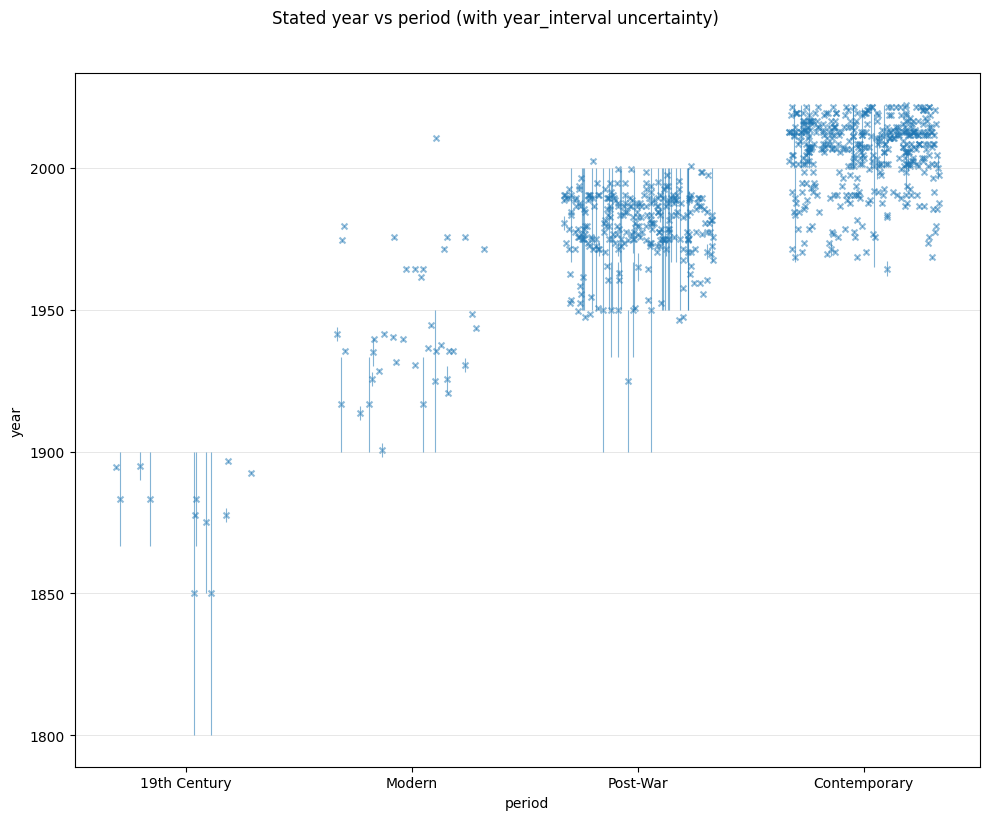

In [193]:
def plot_period_vs_year_intervals(df: pd.DataFrame, seed: int = 42):
    """
    
    """
    d = df[['year', 'year_interval', 'period']].copy()
    d.drop(d[(d['year_interval'] == 222.22) | (d['period'] == '[nan]')].index, inplace = True)
    d.reset_index(drop = True, inplace = True)

    # Build an ordering of periods for nicer reading
    period_order = d.groupby('period')['year'].median().sort_values().index.tolist()

    rng = np.random.default_rng(seed)

    fig, ax = plt.subplots(
        figsize=(10, 8)
    )

    bin_width = 10 / len(period_order)
    notches_x = []
    for row in range(d.shape[0]) :
        # Map periods to integer x positions within this panel
        notch_x = bin_width * (period_order.index(d.loc[row, 'period']) + 0.5)

        # Horizontal jitter so we can see multiple observations per period
        notch_x += rng.uniform(-bin_width / 3, bin_width / 3)

        notches_x.append(notch_x)

    ax.vlines(
        notches_x,
        d['year'] - d['year_interval'] * 0.5,
        d['year'] + d['year_interval'] * 0.5,
        linewidth=interval_lw,
        alpha=0.55
    )

    ax.scatter(notches_x, d['year'], s=18, marker="x", alpha=0.5)

    # Axis formatting
    ax.set_xticks([bin_width * (i + 0.5) for i in range(len(period_order))])
    ax.set_xticklabels(period_order)
    ax.set_xlabel("period")

    ax.grid(True, axis="y", linewidth=0.6, alpha=0.35)

    ax.set_ylabel("year")
    fig.suptitle("Stated year vs period (with year_interval uncertainty)", y=1.02)
    fig.tight_layout()
    plt.show()


plot_period_vs_year_intervals(dataset)

Contrary to the initial hypothesis, the visualisation shows that period labels align closely with the stated years of works. Each period occupies a largely distinct vertical band, with limited overlap between adjacent periods. The majority of year intervals fall well within the expected temporal bounds implied by their period labels.

While some overlap exists—particularly between adjacent periods such as Modern and Post-War—this overlap is modest and primarily driven by works with broader year_interval ranges rather than misaligned stated years. The central clustering of year markers within each period indicates that uncertainty is typically local rather than spanning multiple periods.

This suggests that, despite being a categorical and stylistic descriptor, period encodes substantial chronological information. In practice, period labels act as a coarse but reliable temporal abstraction. The consistency between period and year implies that period may serve as a useful explanatory feature in downstream modelling, either as a categorical predictor or as contextual support for temporal features.
## Correlation heatmap
## 
What is the most impactful visualisation?

In [213]:
training_dataset = pd.concat([
    dataset[training_features],
    artist_attributions,
    signed_features,
    condition_conversion,
    period_features,
    movement_features,
], axis = 1)
statistically_significant_features = [feature for feature in training_dataset if training_dataset[feature].value_counts().values[0] < 745]
price_corr = (
    training_dataset[statistically_significant_features].corr()['price']
      .drop('price')
      .sort_values(key=np.abs, ascending=False)
)

In [216]:
#bruh = training_dataset['Richard Woods'].value_counts()
statistically_significant_features = [feature for feature in training_dataset if training_dataset[feature].value_counts().values[0] < (754 * 0.9)]
statistically_significant_features
#print(bruh.values[0] > 744)

['price',
 'works_by_artist',
 'year',
 'year_interval',
 'is_signed',
 'is_dated',
 'is_numbered',
 'is_titled',
 'not examined out of frame',
 'this work is in very good condition',
 'excellent condition',
 'direct from the publisher',
 'this work is in good condition',
 'Contemporary',
 'Post-War',
 'Realism',
 'Abstract',
 'Expressionism',
 'Pop Art',
 'Conceptual ',
 'Abstract Expressionism',
 'Modernism']

In [214]:
price_corr

excellent condition                                            0.237814
direct from the publisher                                      0.217502
Contemporary                                                   0.198325
Abstract Expressionism                                         0.197436
not examined out of frame                                     -0.194410
this work is in very good condition                           -0.192917
Post-War                                                      -0.191688
the work is in excellent condition                             0.191609
Pop Art                                                        0.169732
Modernism                                                      0.162006
this work is in good condition                                -0.154363
not examined outside of frame                                 -0.137884
artwork not examined outside of frame                         -0.130439
no obvious signs of wear to art                               -0

<Axes: >

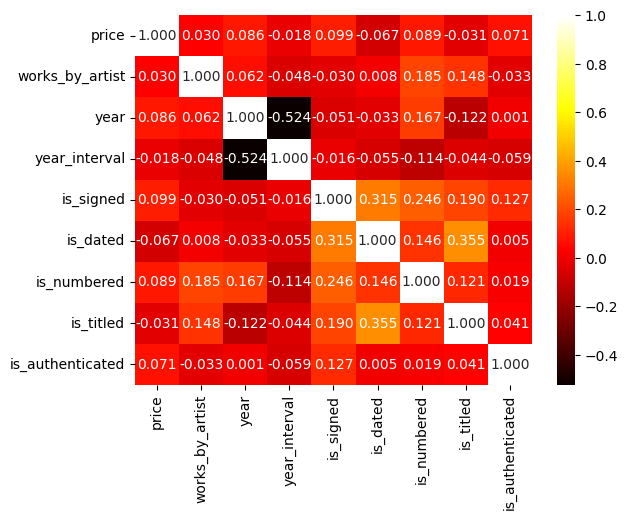

In [155]:
correlation_matrix = numerical_features.corr()
sb.heatmap(correlation_matrix, annot=True, cmap='hot', fmt='.3f')

# Training a linear regression model